# SD212: Graph mining
## Lab 4: Betweenness centrality

You will learn how to compute and intepret the betweenness centrality of nodes in a graph.

You **must** be connected to Telecom ParisTech network!

## Getting started

In [55]:
from connector import Connector

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
base_url = 'http://137.194.192.13:8234'
lab_id = 'lab4'

## To do

* Enter your login and test it using question #0

In [58]:
# Enter your login (last name followed by first letter of first name)
login = 'zhuf'

In [72]:
connector = Connector(base_url, lab_id, login)
get_question = connector.get_question
post_answer = connector.post_answer
post_text = connector.post_text

In [73]:
get_question(0)

Welcome!


## Import

In [74]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [75]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [76]:
import numpy as np

## 1. Notion of betweenness centrality

The betweenneess centrality of node $u$ is defined by: 
$$
C(u) = \sum_{s, t \ne u; s<t} \frac{\sigma_{st}(u)}{\sigma_{st}},
$$
where:
* $\sigma_{st}$ is the number of shortest paths from $s$ to $t$ 
* $\sigma_{st}(u)$ is the number of shortest paths from $s$ to $t$ going through node $u$

After proper normalization, the betweenneess centrality of node $u$ can be interpreted as the probability that a random shortest path between two distinct nodes $s,t \ne u$ goes through $u$:
$$
\bar C(u) = \frac 1 {n-1\choose 2} \sum_{s, t \ne u; s<t} \frac{\sigma_{st}(u)}{\sigma_{st}}.
$$
Unless otherwise specified, we consider the **normalized** betweenness centrality.

## Toy graph

Consider the following graph:

<IPython.core.display.Javascript object>


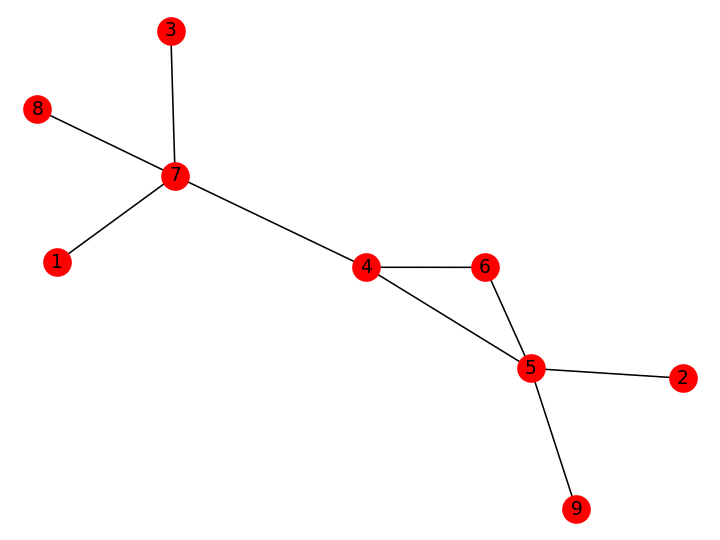

In [77]:
edgelist = [(1,7),(2,5),(3,7),(4,5),(4,6),(4,7),(5,6),(5,9),(7,8)]
G = nx.Graph()
G.add_edges_from(edgelist)
figure()
nx.draw(G,with_labels = True)

## To do

* Answer question #1 **(0.5 point)**
* Check the betweenness centrality of each node using the `networkx` function (see below)

In [78]:
get_question(1)

What is the most central node in this graph?
(Guess and check!)


In [79]:
answer = 7

In [80]:
post_answer(1,answer)

This is correct!


In [81]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5714285714285714,
 5: 0.46428571428571425,
 6: 0.0,
 7: 0.6428571428571428,
 8: 0.0,
 9: 0.0}

## Path graph

Now consider a path graph:

<IPython.core.display.Javascript object>


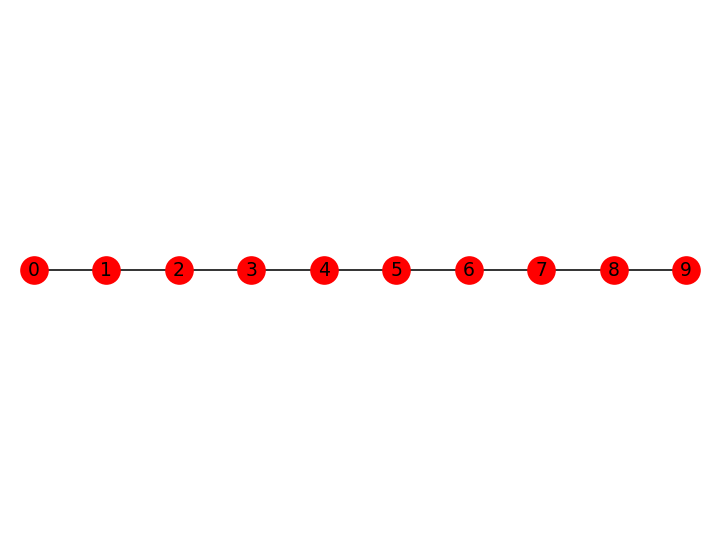

In [82]:
n = 10
G = nx.path_graph(n)
pos = [(i,0) for i in range(n)]
figure()
nx.draw(G,pos,with_labels = True)

## To do

* What is the betweenness centrality of node 3 in the above graph of 10 nodes?
* Answer question #2 **(0.5 point)**

In [83]:
get_question(2)

What is the normalized betweenness centrality of node 3758 in a path graph of 10000 nodes indexed from 0 to 9999?
(Enter a float; note that you can't use the networkx function because the graph is too large!)


In [99]:
(3753*6241*2)/(9999*9998)

0.4685900276364904

In [100]:
answer = 0.4685900276364904

In [101]:
post_answer(2,answer)

This is correct!


## Real datasets

We now consider the following real datasets, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab4.zip):
* the graph of [Les Misérables](https://fr.wikipedia.org/wiki/Les_Misérables) (co-occurence of characters in chapters of the novel of Victor Hugo),
* the graph of [Wikipedia for Schools](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools) (links between a selection of articles from Wikipedia).

## To do

* List the 10 most central characters of Les Misérables
* Answer question #3 **(0.5 point)**
* Answer question #4 **(open answer)**

In [138]:
G = nx.read_graphml("miserables.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')

<IPython.core.display.Javascript object>


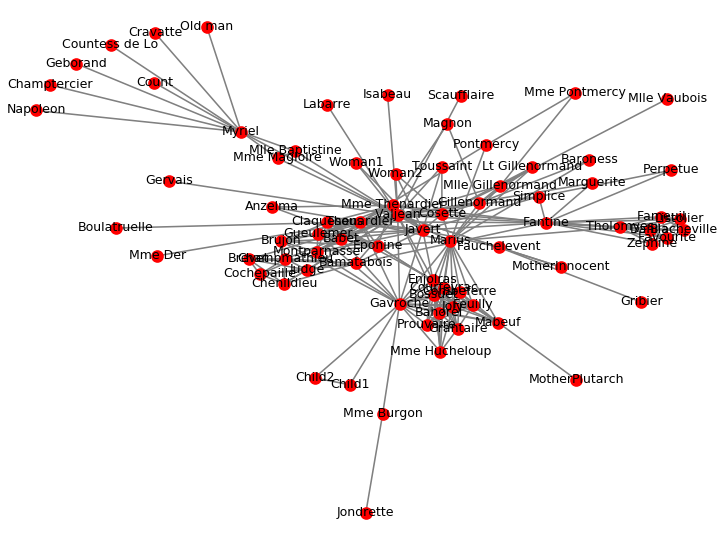

In [141]:
figure()
nx.draw(G, labels = names,font_size = 8,node_size = 50,edge_color = 'gray')

In [149]:
C = nx.betweenness_centrality(G)
c = sorted(C.items(), key=lambda kv: kv[1], reverse=True)

In [150]:
i = 0
print(G.nodes)
for key, val in c:
    if(i>5):
        break
    print(G.nodes[key]['name'])
    i= i+1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Valjean
Myriel
Gavroche
Marius
Fantine
Thenardier


In [152]:
nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
i = 0
for key, val in nodes:
    if(i>10):
        break
    print(G.node[key]['name'])
    i= i+1

Valjean
Gavroche
Marius
Javert
Thenardier
Fantine
Enjolras
Courfeyrac
Bossuet
Bahorel
Joly


In [102]:
get_question(3)

Which character is in the top-5 for betweenness centrality but not in the top-10 in terms of degree?
(Enter a string)


In [153]:
answer = "Myriel"

In [154]:
post_answer(3,answer)

This is correct!


In [155]:
get_question(4)

Explain the previous result.
(Recall that you can explore the graph with the mouse)


In [44]:
post_text(4)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted


## To do


The exact computation of betweenness centrality is too expensive for the graph of Wikipedia for Schools. We will use the parameter `k` of the `networkx` function `betweenness_centrality` to get an approximate value based on `k` samples of the source node `s`.

* List the 10 most central articles of Wikipedia for Schools (try several values for `k` and several independent results for the same value of `k`)
* Answer question #5 **(0.5 point)**

In [160]:
G = nx.read_graphml("wikipedia-schools.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')

In [181]:
C = nx.betweenness_centrality(G, k = 10, seed = 389)
c = sorted(C.items(), key=lambda kv: kv[1], reverse=True)
i = 0
setA = []
for key, val in c:
    if(i>10):
        break
    setA.append(key)
    i= i+1
setA = set(setA)

In [182]:
nodes = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
setB =[]
i = 0
for key, val in nodes:
    if(i>10):
        break
    setB.append(key)
    i= i+1
setB = set(setB)


In [183]:
get_question(5)

Which nodes are in the top-10 in terms of centrality but not in the top-10 in terms of in-degree?
(Enter a list of integers; you must use the networkx function betweenness_centrality with k = 10 and seed = 389)


In [184]:
answer = list(setA - setB)
print(answer)

[98, 294, 263, 44, 13, 213]


In [185]:
post_answer(5,answer)

This is correct!


## 2. Brandes' algorithm

We will now implement Brandes' algorithm.

## Counting the number of shortest paths

The following function based on Breadth First Search (BFS) returns:
* `d`, dictionary of the shortest distances from node `s` (in number of hops)
* `S`, list of nodes ordered in increasing distance from `s`

In [294]:
def BFS(G,s):
    d = {u:float(inf) for u in G.nodes()}
    rho = {u:0 for u in G.nodes()}
    
    S = [s]
    Q = [s]
    d[s] = 0
    rho[s] = 1

    while Q != []:
        u = Q.pop()
        for v in G.neighbors(u):
            if v not in S:
                S.append(v)
                d[v] = d[u] + 1
                Q = [v] + Q
            if(d[v] == d[u] + 1):
                rho[v] = rho[v] + rho[u]
    return d,S, rho

## To do

* Modify the above function so that it also returns a dictionary of the numbers of shortest paths from `s`
* Answer question #6 **(1 point)**

In [217]:
arg = get_question(6)
for node,data in G.nodes(data=True):
    if data['name'] == 'Edward_VIII_of_the_United_Kingdom':
        print(node)
    if data['name'] == 'Dunnock':
        print(node)

What is the number of shortest paths between Edward_VIII_of_the_United_Kingdom and Dunnock in the graph of Wikipedia for Schools?
(Enter an integer; node indices are in the argument)
3155
3445


In [218]:
BFS(G, 3155)[0][3445]

4

In [219]:
answer = 4

In [220]:
post_answer(6,answer)

This is correct!


## Recursion

Brandes' algorithm is based on the following recursion:
$$
\delta_s(u) = \sum_{v: d_{sv} = d_{su} + 1}   \frac{\sigma_{su}}{\sigma_{sv}}(1+\delta_s(v)),
$$
where
$$
\delta_s(u) = \sum_{t \ne u} \frac{\sigma_{st}(u)}{\sigma_{st}}.
$$
We then get for undirected graphs:
$$
 C(u) =\frac 1 2 \sum_{s\ne u} \delta_s(u)
$$
and for directed graphs:
$$
 C(u) =\sum_{s\ne u} \delta_s(u).
$$
After proper normalization, we get values between 0 and 1. When the betweenness centrality is estimated based on some sample nodes `s`, this is the probability that a random shortest path starting from one of these nodes `s` (chosen at random) to a random destination goes through `u`.

## To do

* Complete the function `betweenness_centrality` below that returns the normalized betweenness centrality based on sample nodes `s` given as a list
* Check your code by comparing your function to that of `networkx` on a small graph of your choice
* Answer question #7 **(2 points)**
* Answer question #8 **(open answer)**

In [351]:
def betweenness_centrality(G, samples = None):
    '''samples: list of sample nodes s (default = None)
                if None then all nodes are considered'''
    C = {u:0 for u in G.nodes()}
    
    if samples == None:
        samples = list(G.nodes())
    
    for sample in samples:
        d,S,rho = BFS(G, sample)
        phi= {u:0 for u in G.nodes()}
        
        for node_u in S[::-1]:
            for node_v in G.neighbors(node_u):
                if(d[node_v] == d[node_u] + 1):
                    if(rho[node_v] == 0 or rho[node_v] == float(inf) ): continue
                    phi[node_u] +=  rho[node_u]/rho[node_v] * (1 + phi[node_v])
        for node_u in S:
            if(sample != node_u):
                C[node_u] += phi[node_u]
                
    return C

In [352]:
print(arg)
dic = betweenness_centrality(G, arg['samples'])

{'samples': [2349, 1931, 1512]}


In [350]:
d,S,rho = BFS(G, 2349)
rho

{0: 0,
 1: 8,
 2: 6,
 3: 102,
 4: 1,
 5: 76,
 6: 26,
 7: 34,
 8: 16,
 9: 7,
 10: 2,
 11: 1,
 12: 0,
 13: 3,
 14: 1,
 15: 17,
 16: 1,
 17: 2,
 18: 3,
 19: 1,
 20: 36,
 21: 1,
 22: 7,
 23: 43,
 24: 3,
 25: 4,
 26: 18,
 27: 2,
 28: 1,
 29: 38,
 30: 5,
 31: 4,
 32: 0,
 33: 11,
 34: 16,
 35: 7,
 36: 2,
 37: 4,
 38: 6,
 39: 1,
 40: 1,
 41: 11,
 42: 3,
 43: 1,
 44: 1,
 45: 8,
 46: 3,
 47: 4,
 48: 12,
 49: 1,
 50: 1,
 51: 31,
 52: 0,
 53: 2,
 54: 2,
 55: 3,
 56: 1,
 57: 16,
 58: 1,
 59: 0,
 60: 1,
 61: 3,
 62: 34,
 63: 7,
 64: 1,
 65: 8,
 66: 0,
 67: 29,
 68: 2,
 69: 2,
 70: 3,
 71: 1,
 72: 2,
 73: 0,
 74: 16,
 75: 18,
 76: 2,
 77: 2,
 78: 1,
 79: 9,
 80: 2,
 81: 3,
 82: 3,
 83: 8,
 84: 1,
 85: 1,
 86: 26,
 87: 3,
 88: 1,
 89: 1,
 90: 4,
 91: 6,
 92: 11,
 93: 2,
 94: 27,
 95: 1,
 96: 2,
 97: 2,
 98: 2,
 99: 8,
 100: 7,
 101: 1,
 102: 6,
 103: 1,
 104: 27,
 105: 13,
 106: 25,
 107: 26,
 108: 39,
 109: 54,
 110: 44,
 111: 62,
 112: 12,
 113: 14,
 114: 6,
 115: 3,
 116: 9,
 117: 6,
 118: 1,
 119:

In [346]:
G.number_of_nodes()

4591

In [348]:
dic[183] /((3)*(G.number_of_nodes() - 2))

0.0054735266777766155

In [304]:
def betweenness_centrality(G, samples = None):
    '''samples: list of sample nodes s (default = None)
                if None then all nodes are considered'''
    C = {u:0 for u in G.nodes()}
    
    if samples == None:
        samples = list(G.nodes())
        
    for node in samples:
        d, S, ds = BFS(G, node)
        #d, dictionary of the shortest distances from node s (in number of hops)
        #S, list of nodes ordered in increasing distance from s
        #ds,  numbers of shortest paths from s
        leng = len(S)
        Cnode = {u:0 for u in G.nodes()}
        for CindU in range(leng):
            indU = leng - CindU - 1
            u = S[indU]
            for v in G.neighbors(u):
                if d[v] == d[u] + 1:
                    Cnode[u] += ds[u]/ds[v] * (1+Cnode[v])
        for u in G.nodes():
            if node != u:
                C[u] += Cnode[u]
    
    
    return C

ans = betweenness_centrality(G, samples = arg['samples'])
norm = (3)*(G.number_of_nodes() - 2)
answer =ans[183]/norm

In [305]:
print(answer)

0.0054735266777766155


In [285]:
G = nx.read_graphml("wikipedia-schools.graphml", node_type = int)

In [250]:
rho, d = BFS(G, 1512)
[key for key,val ddin rho.items() if val == 0]

SyntaxError: invalid syntax (<ipython-input-250-ad503a01169c>, line 2)

In [286]:
arg = get_question(7)
for node,attr in G.nodes(data= True):
    if attr['name'] == 'Europe':
        print(node)

What is the betweenness centrality of the article Europe of Wikipedia for Schools based on the sample nodes given in the argument?
(Enter a float)
183


In [287]:
print(arg)
dic = betweenness_centrality(G, arg['samples'])

{'samples': [2349, 1931, 1512]}


2830.9049617920055

In [302]:
answer = 0.0002610076636384702

In [306]:
post_answer(7,answer)

This is correct!
